In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler

df = fetch_california_housing(as_frame = True)['frame']


1.  Направете основен експлораторен анализ като вземете дескриптивни статистики.

    Проверяваме за ненулеви стойности , очевидно няма такива.

In [2]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Дескриптивните статистики на данните : 

In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


50-тия персентил в горната таблица отговаря в повечето случаи на медианата.
outlier-ите имат по-малък ефект върху медианата. При срявнявнение на средната с медианата от тааблицата се стига до следното заключение:
    Очевидно при всички променливи има нетипични наблюдения, затова те ще бъдат отстранени, но преди това ще покажем данните с включените нетипични наблюдения(outliers)
Освен това нетипичните наблюдения влияят и върху корелацията , а и интерпретирането на анализа на данните

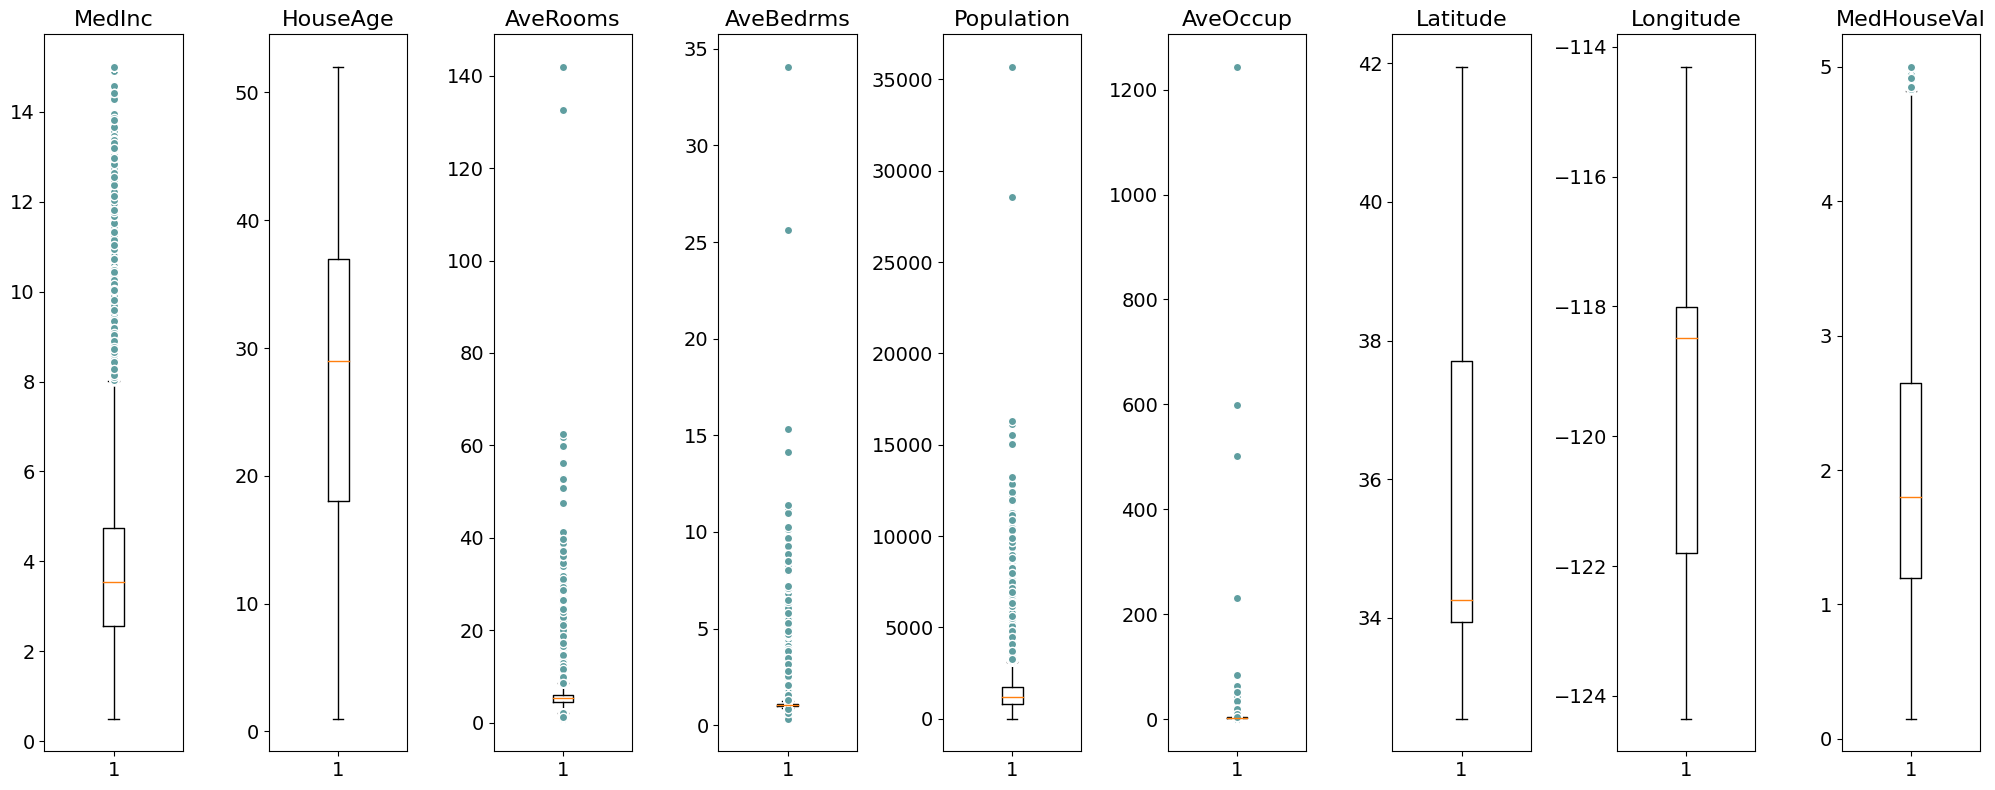

In [4]:
circle = dict(markerfacecolor = 'cadetblue', marker = 'o', markeredgecolor = 'white')
fig, axs = plt.subplots(1, len(df.columns), figsize = (20,8))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops = circle)
    ax.set_title(df.columns[i], fontsize = 16)
    ax.tick_params(axis = 'y', labelsize = 14)
    ax.tick_params(axis = 'x', labelsize = 14)
plt.tight_layout()

Представяме графика, при която разглеждаме отношението между всяка една променлива със средната стойност на имота

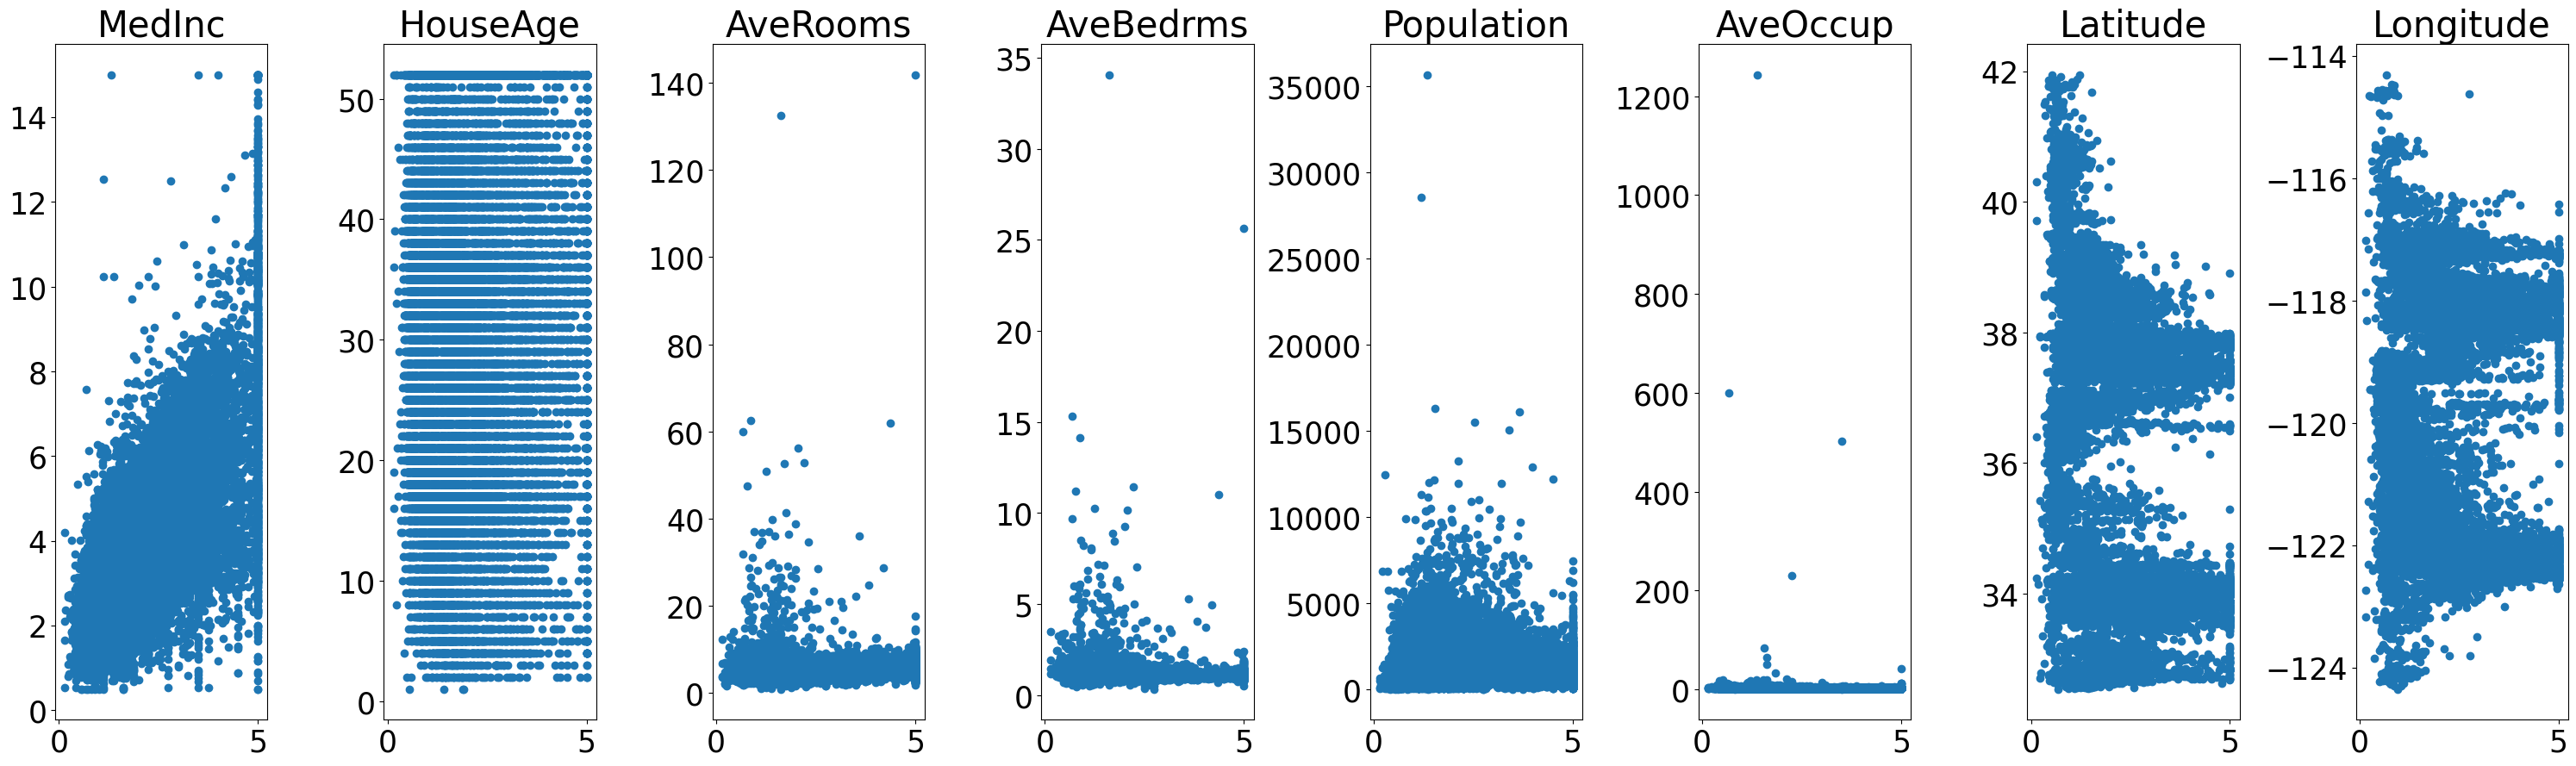

In [5]:
fig, axs = plt.subplots(1, len(df.columns) - 1, figsize = (30,9))
for i, ax in enumerate(axs.flat):
    ax.scatter(df.MedHouseVal, df.iloc[:,i])
    ax.set_title(df.columns[i], fontsize = 30)
    ax.tick_params(axis = 'y', labelsize = 25)
    ax.tick_params(axis = 'x', labelsize = 25)
plt.tight_layout()

Премахваме нетипичните наблюдения(outliers):

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)
df= df[~((df < (Q1-1.5 * IQR)) | (df > (Q3+1.5*IQR))).any(axis = 1)]
df.shape

MedInc           2.179850
HouseAge        19.000000
AveRooms         1.611665
AveBedrms        0.093447
Population     938.000000
AveOccup         0.852520
Latitude         3.780000
Longitude        3.790000
MedHouseVal      1.451250
dtype: float64


(16312, 9)

Показваме на графики, новите данни без нетипичните наблюдения: 

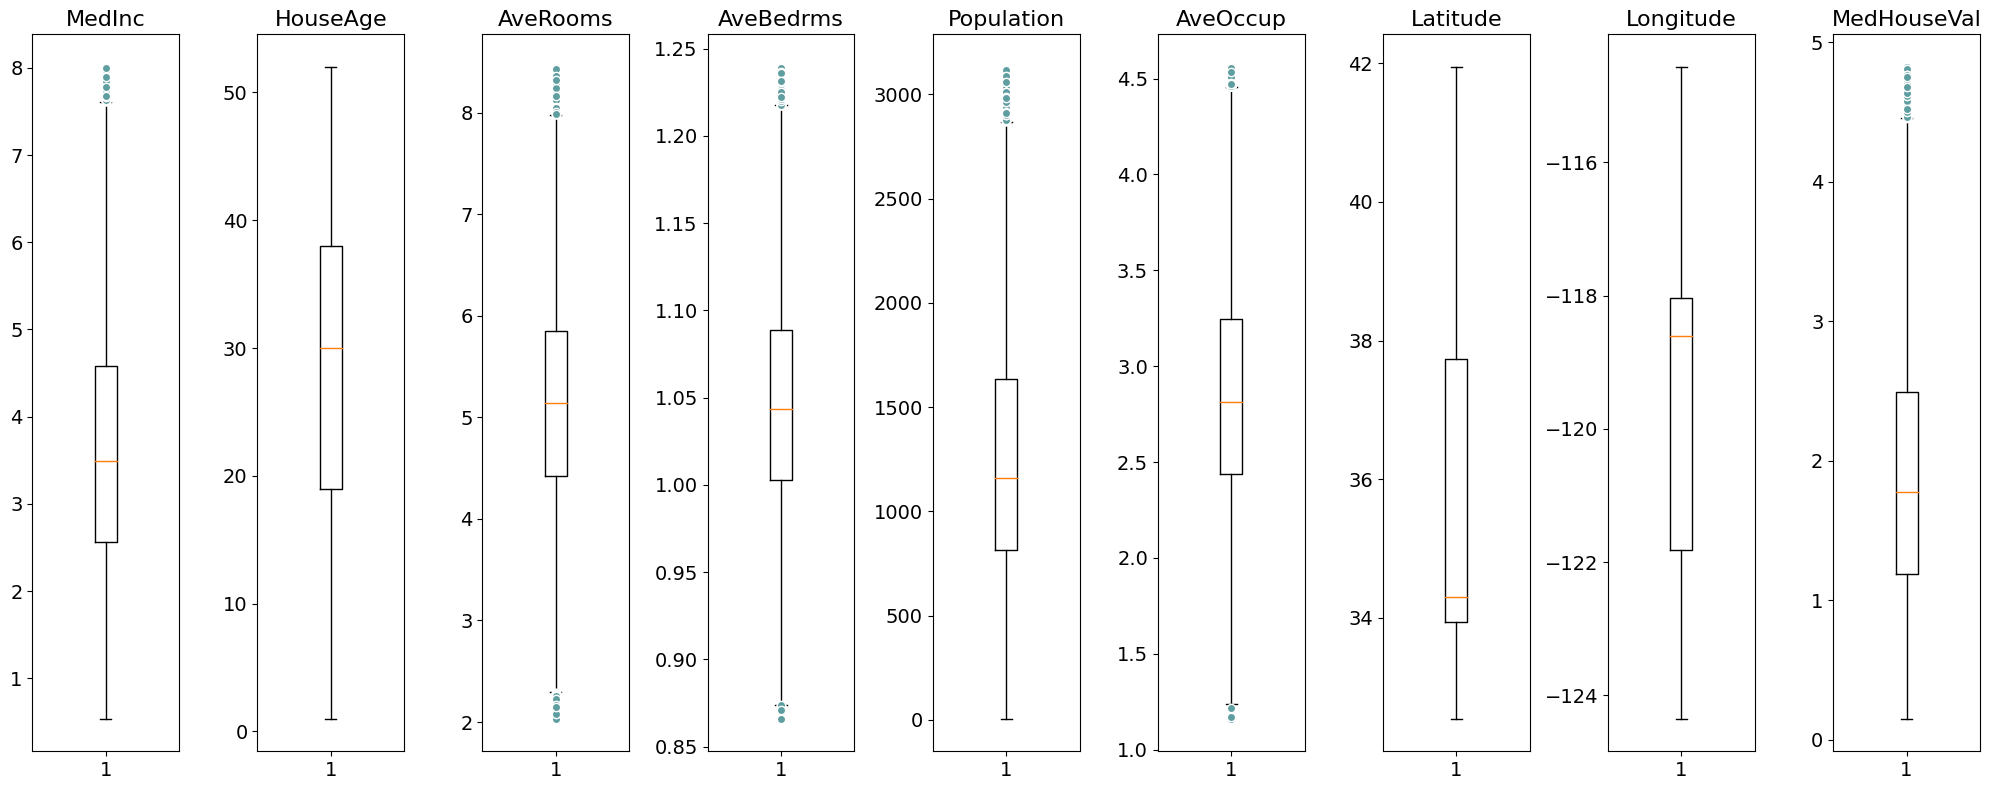

In [7]:
circle = dict(markerfacecolor = 'cadetblue', marker = 'o', markeredgecolor = 'white')
fig, axs = plt.subplots(1, len(df.columns), figsize = (20,8))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops = circle)
    ax.set_title(df.columns[i], fontsize = 16)
    ax.tick_params(axis = 'y', labelsize = 14)
    ax.tick_params(axis = 'x', labelsize = 14)
plt.tight_layout()

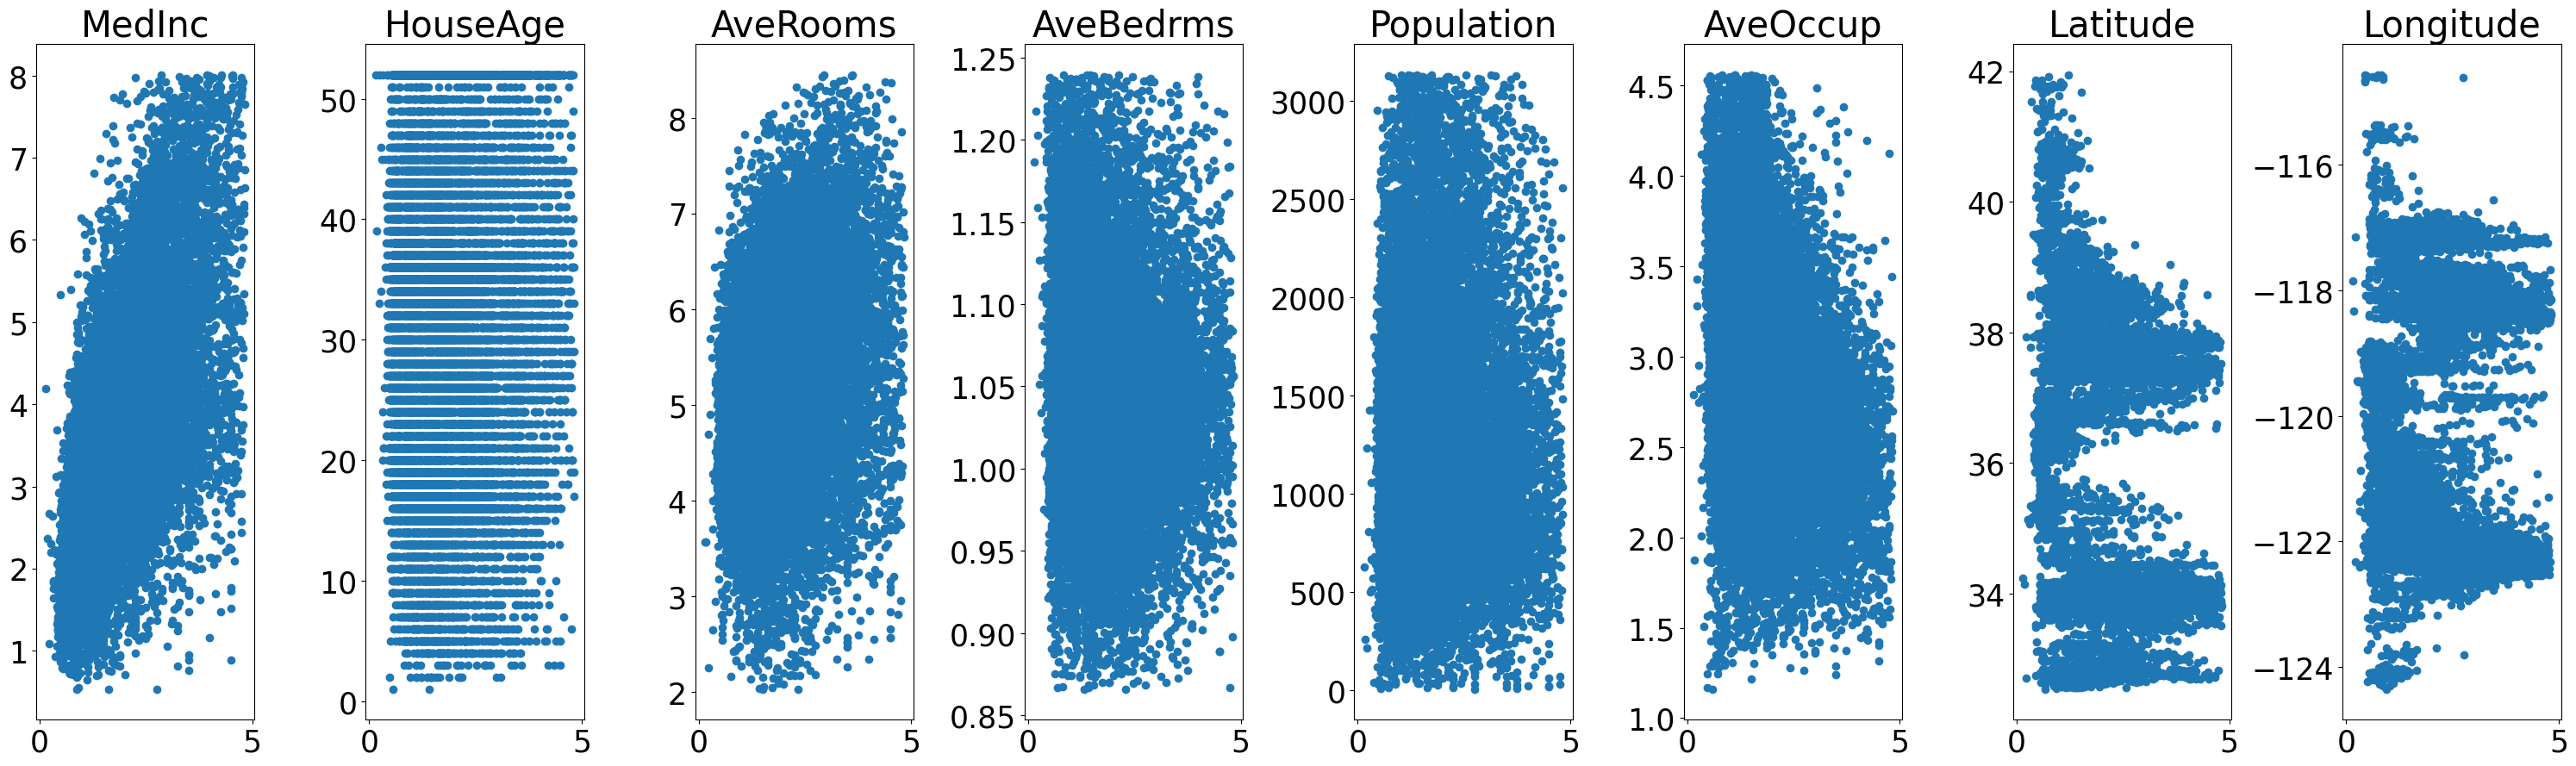

In [8]:
fig, axs = plt.subplots(1, len(df.columns) - 1, figsize = (30,9))
for i, ax in enumerate(axs.flat):
    ax.scatter(df.MedHouseVal, df.iloc[:,i])
    ax.set_title(df.columns[i], fontsize = 30)
    ax.tick_params(axis = 'y', labelsize = 25)
    ax.tick_params(axis = 'x', labelsize = 25)
plt.tight_layout()

2.  Проверете корелация на Pearson и на Spearman между MedHouseVal и останалите променливи (може да го направите в loop, за по-бързо). Изведете и значимост на корелациите.

In [9]:
c1 = df.MedHouseVal
l = len(df.columns)
print('\n','Pearson correlation between the features and feature:MedHouseVal: ')
for i in range (0, l):
    res1 = c1.corr(df.iloc[:,i],method = 'pearson')
    print(res1)
print('\n','Spearman correlation between the features and feature:MedHouseVal: ')
for i in range (0, l):
    res2 = c1.corr(df.iloc[:,i],method = 'spearman')
    print(res2)


 Pearson correlation between the features and feature:MedHouseVal: 
0.6329710945181025
0.08791074780402493
0.26023686674356444
-0.09907947884777893
-0.005995491812031555
-0.27550447374782844
-0.15047866337161864
-0.04310339206703423
1.0

 Spearman correlation between the features and feature:MedHouseVal: 
0.6472787884163902
0.0637568400805814
0.24279552726018014
-0.11135040199803645
0.007970773112303512
-0.25187582928687063
-0.16586969581149338
-0.06288117426802098
0.9999999999999998


<Axes: >

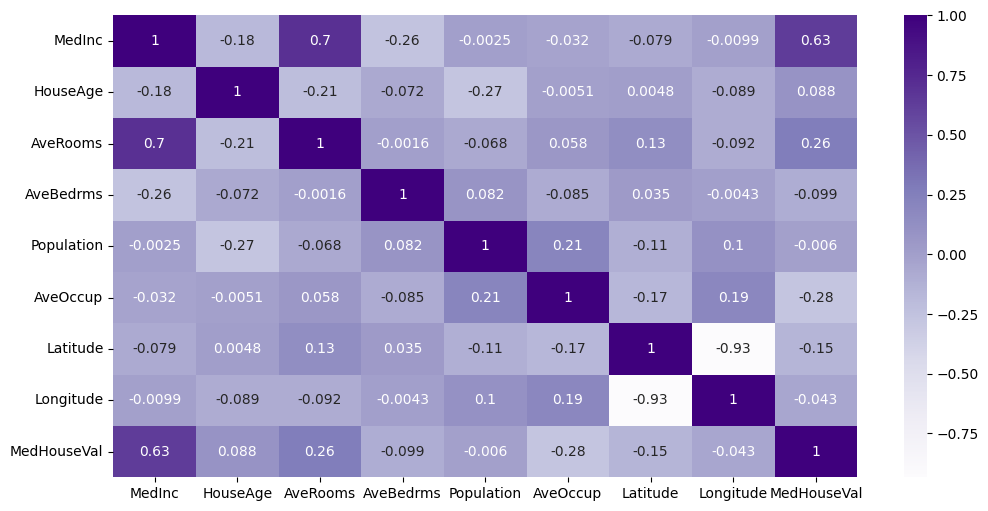

In [10]:
import seaborn as sns
plt.figure(figsize= (12,6))
sns.heatmap(df.corr(),annot = True, cmap='Purples')

3.  Направете хистограма на MedHouseVal. Кога използваме хистограма и кога колонна диаграмa (bar chart)?

Хистограмата се използва за графичното представяне на честотното разпределение на непрекъснати променливи, докато колонната диаграма се използва за представяне на разликии от дискретни променливи.

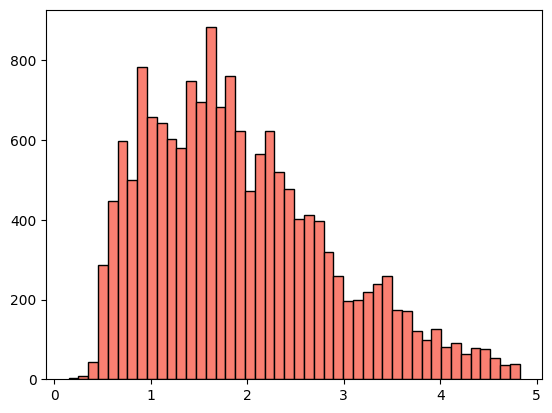

In [11]:
plt.hist(df.MedHouseVal, bins='fd', ec='k', color = 'salmon')
plt.show()

4.  Разделете данните на тренингови и тестови, като не забравяте да зададете random_state по ваш избор, за да могат резултатите ви да бъдат репродуцирани.

In [12]:
X = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=36)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5.  Направете линеен модел, като правите необходимите проверки за основните предположения на модела.

In [14]:
linReg = LinearRegression()
model = linReg.fit(X_train,y_train)
LinearRegression()
yTS = model.predict(X_test)
yTR = model.predict(X_train)
print (yTS,'\n',yTR)

[2.34256227 1.34388683 2.61410638 ... 1.71265823 2.20019914 0.79820516] 
 [1.26322838 1.45436145 1.85576802 ... 2.70741351 2.91649123 1.3245941 ]


6.  Какво означава коефициент на детерминация? Какъв е коефициентът на детерминация на модела? Колко е MSE върху тренинговите и върху тестовите данни?

Коефициентът на детерминация е квадрат на корелационния коефициент, изразява връзката между две променливи, представлява процент от вариацииите между променливите.

In [15]:
lS = linReg.score(X_train, y_train)
mT = mean_squared_error(yTS, y_test)
mR = mean_squared_error(yTR, y_train)
print('R^2 :', lS, '\n')
print('Mean squared error for tested data: ',mT,'\n','Mean squared error for trained data: ',mR)

R^2 : 0.6396578707268966 

Mean squared error for tested data:  0.31706125020819154 
 Mean squared error for trained data:  0.3241892822854389
